# Numpy<a href="https://github.com/milocortes/python_course_summer_school_DMDU_2022/blob/main/notebooks/numpy_dmdu_2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

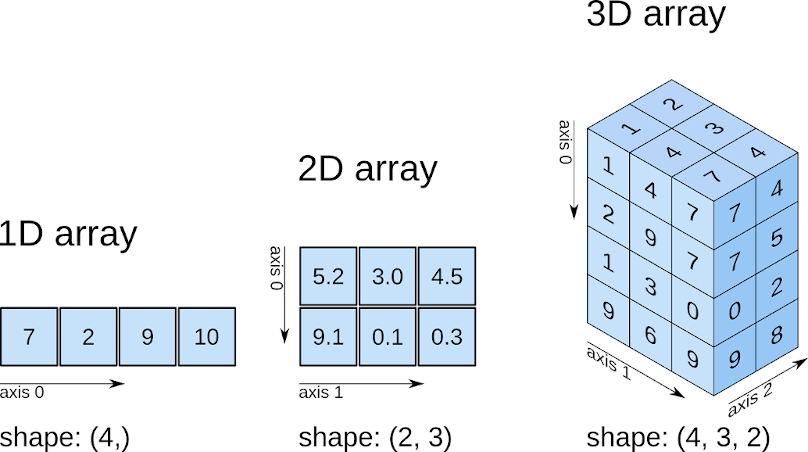
source : https://www.oreilly.com/library/view/elegant-scipy/9781491922927/ch01.html
	

# Numpy

**Numpy** is a library specialized for numerical calculations.

Numpy is the basis of many high-level libraries for data science and machine learning (Pandas, scikit-learn,TensorFlow, Pytorch, etc).

The basic structure of the Numpy library are **numpy arrays**. 

Numpy arrays are similar to Python list but with some added bonuses:

* Numpy arrays have a smaller memory footprint and are faster in most instances.
* Numpy arrays are more convenient when accessing more than two axes, know as *multidimensional* data (multidimensional list are difficult to access and modify)
* Numpy arrays have more powerful access functionality, such as broadcasting.

# Numpy

Numpy stores data in contiguous chunks of memory and support vectorized operations on its data.

Vectorized operations?

# Main memory and caches

The **memory** is actually a hierarchy of components that store data, ranging from one or more levels of small, fast **caches** to a large and relatively slow **main memory** :

Architectural principle: **procesors and main memory are far apart**.

One of the challenges is trying to reduce the time (latency) it takes to access the
memory.

# Processors 
A multiprocessor consists of multiple hardware **processors**, each of which execute a sequencial program. 

In a multiprocessor or sigle-processor architectures, the basic unit of time is the **cycle**: the time it takes a processor to fetch and execute a single instruction,

to fetch? where? in main memory.



# Main memory and caches

Processors share a main memory, which is a large array of **words**, indexed by **address**. The size of a word or an address is plataform-dependent, but tipically it is either 32 of 64 bits.

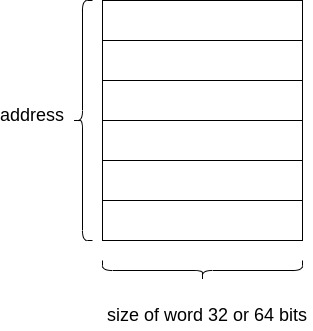

A processor reads a value from memory by sending a message containing the desired address to memory.

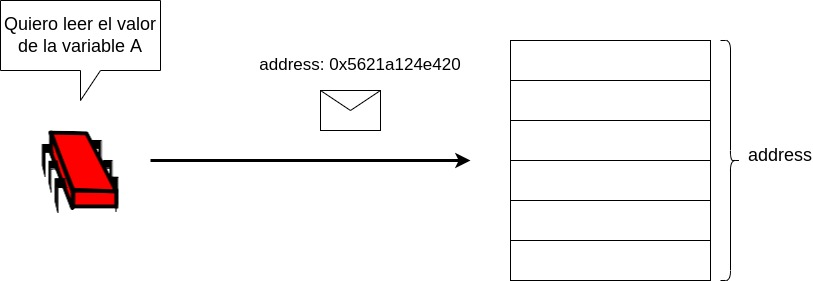

The response message contains the associated **data**, that is, the contents of memory at that address.
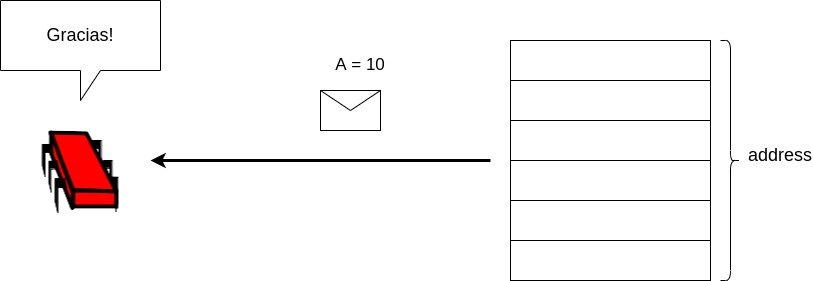

A processor writes a value by sending the address and the new data to memory, and the memory sends back an acknowledgment when the new data have been installed.
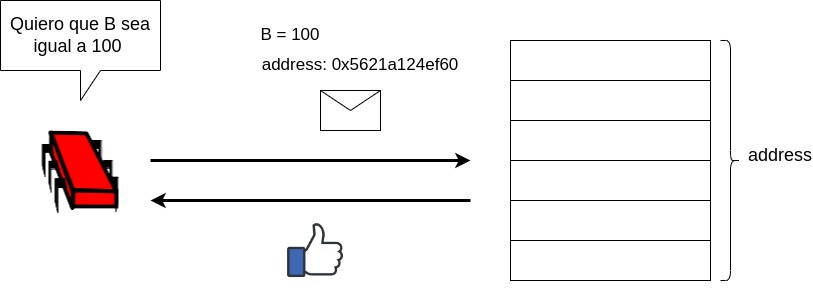

Remember:

Architectural principle: **procesors and main memory are far apart**.

A main memory access may take hundreds of cycles, so there is a real danger that a processor may spend much of its time just waiting for the memory to respond to requests.

Modern systems alleviate this problem by introducing one or more *caches*: small memories that are situated closer to the processors and therefore much faster than main memory. 

These caches are logically situated "between" the processor and the memory: When a processor attempts to read a value from a given memory address, it first looks to see if the value is already in the cache, and if so, it does not need to perform the slower access to memory. 



### *L1*, *L2* and *L3* caches
If the desired address's value was found, we say the processor **hits** in the cache, and otherwise it **misses**.

In practice, most processors have two or three levels of caches, called *L1*, *L2* and *L3* caches. All but the last (and largest) cache tipically reside on the same chip as the processor.

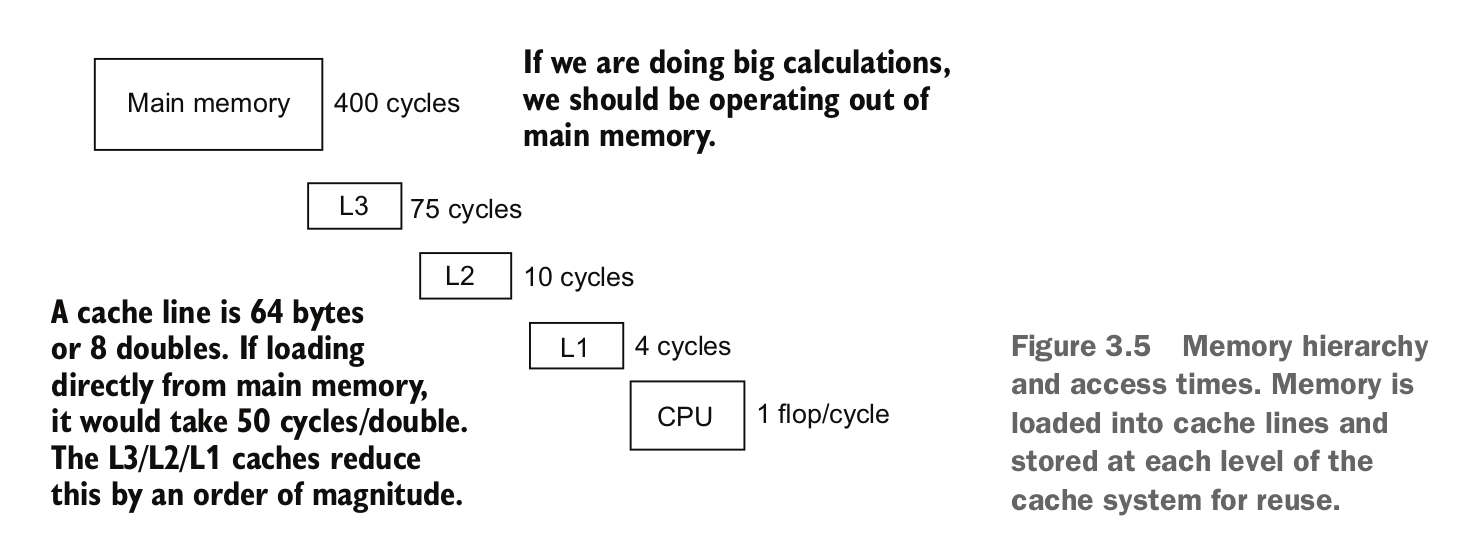

# Granularity

If a processor reads or write a memory location, then it is also likely to read or write *nearby* locations soon. To exploit this, caches tipically operate at a **granularity** larger than single word: A cache holds a group of neighboring words called **cache lines**.

# Vectorized operations
Processors have special vector units that can load and operate on more than one data element at a time.

**Vectorization** is the process of grouping operations together so more than one can be done at a time.

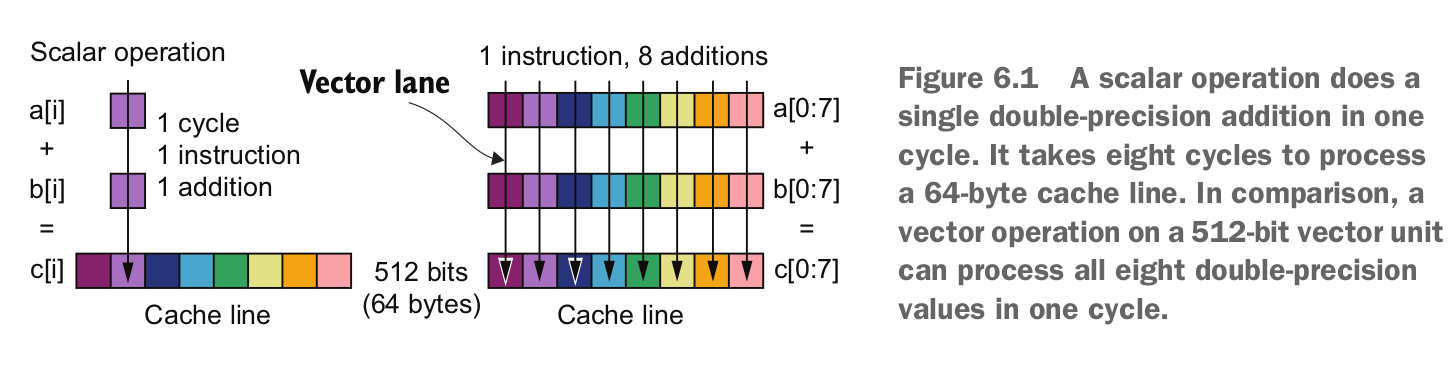

# a lot theory for now... let's get to hands on

In [2]:
import numpy as np

# Creating a 1D array from list
a = np.array([1, 2, 3])
a

array([1, 2, 3])

In [4]:
# Creating a 2D array from a list of lists
b = np.array([[1,2],
              [3,4]])
b

array([[1, 2],
       [3, 4]])

In [5]:
# Creating a 3D array from a list of lists of lists
c = np.array([
    [[1, 2], [3, 4]],
    [[5, 6], [7, 8]]
])
c

array([[[1, 2],
        [3, 4]],

       [[5, 6],
        [7, 8]]])

You can calculate basic arithmetic operator <code>+</code>,<code>-</code>,<code>*</code> and <code>/</code> on two numpy array. 

These *element-wise operations* combine two arrays <code>a</code> and <code>b</code> (for example, adding them together with the <code>+</code> operator) by combining each element of array <code>a</code> with the corresponding element of array <code>b</code>.

In [7]:
a = np.array([[1, 0, 0],
              [1, 1, 1],
              [2, 0, 0]])
b = np.array([[1, 1, 1],
              [1, 1, 2],
              [1, 1, 2]])
a+b

array([[2, 1, 1],
       [2, 2, 3],
       [3, 1, 2]])

In [8]:
a-b

array([[ 0, -1, -1],
       [ 0,  0, -1],
       [ 1, -1, -2]])

In [9]:
a*b

array([[1, 0, 0],
       [1, 1, 2],
       [2, 0, 0]])

In [10]:
a/b

array([[1. , 0. , 0. ],
       [1. , 1. , 0.5],
       [2. , 0. , 0. ]])

Numpy provides a lot of more capabilities for manipulating arrays, including the <code>np-max()</code>, <code>np.min()</code>, <code>np.average()</code> functions which calculates the *maximum*,*minimum* and *average* values of all values in a numpy array, respectly. 

In [11]:
a = np.array([[1, 0, 0],
              [1, 1, 1],
              [2, 0, 0]])
np.max(a)

2

In [12]:
np.min(a)

0

In [13]:
np.average(a)

0.6666666666666666

# Problem 1

Let's tackle this problem by using the salary data of Alice, Bob and Tim. It seems like Bob has enjoyed the highest salary in the last three years. But is he actually bringing home the most money, considering the individual tax rate of our three friends?

In [16]:
## Data : yearly, salary in ($1000) [2017, 2018, 2019]
alice = [99, 101, 103]
bob = [110, 108, 105]
tim = [90, 88, 85]

salaries = np.array([alice,bob,tim])
taxation = np.array([[0.2, 0.25, 0.22],[0.4,0.5,0.5],[0.1,0.2,0.1]])

# the element-wise multiplication of two multidimensional arrays is called the Hadamard product
max_income = np.max(salaries - salaries*taxation)
max_income

81.0

# Working with numpy arrays: Slicing, Broadcasting and Array types

Indexing and slicing in numpy are similar to indexing and slicing in Python: you can access elements of a one-dimensional array by using the bracket operation <code>[]</code> to specify the index or index range.

You can aso use indexing for a multidimensional array by specifying the index for each dimension independently and using comma-separated indices to access the different dimensions. 

For example, the indexing operation <code>y[0,1,2]</code> would access the first element of the first axis, the second element of the second axis, and the third element of the third axis. 

In [20]:
y = np.array([
    [[1, 2, 3], [4, 5, 6]],
    [[6, 7, 8], [8, 9, 10]]
])

y[0,1,2]

6

The next are slicing examples in numpy arrays:

In [21]:
a = np.array([55, 56, 57, 58, 59, 60, 61])
a[:]

array([55, 56, 57, 58, 59, 60, 61])

In [22]:
a[::2]

array([55, 57, 59, 61])

In [23]:
a[1::2]

array([56, 58, 60])

In [24]:
a[::-1]

array([61, 60, 59, 58, 57, 56, 55])

In [25]:
a = np.array([[0, 1, 2, 3],
              [4, 5, 6, 7],
              [8, 9, 10, 11],
              [12, 13, 14, 15]])

# get third column
a[:,2]

array([ 2,  6, 10, 14])

In [27]:
# get second row
a[1,:]

array([4, 5, 6, 7])

In [28]:
# get second row by 2 step
a[1,::2]

array([4, 6])

In [29]:
# all columns except last
a[:, : -1]

array([[ 0,  1,  2],
       [ 4,  5,  6],
       [ 8,  9, 10],
       [12, 13, 14]])

## Broadcasting

*Broadcasting* describes the automatic process of bringing two numpy arrays into the same shape so that you can apply certain element-wise operations. 

In the next example, each array comprises several *axes*, one for each dimension. The array attribute <code>ndim</code> stores the number of axes of this particular array.  

In [30]:
a = np.array([1, 2, 3, 4])
a.ndim

1

In [36]:
b = np.array([[2, 1, 2] , [3, 2, 3], [4, 3, 4]])
b.ndim

2

In [41]:
c = np.array([[[1, 2, 3], [2, 3, 4], [3, 4, 5]],
              [[1, 2, 4],[2, 3, 5],[3, 4, 6]]])
c.ndim

3

Each array has an associated shape attribute, a tuple that gives you the number of elements in each axis. For a two-dimensional array, there are two values in the tuple: the number of rows and the number of colums. For higher-dimensional arrays, the *i*-th tuple specifies the number of elements of the *i*-th axis. 

In [34]:
a.shape

(4,)

In [39]:
b = np.array([[2, 1, 2] , [3, 3, 3], [4, 3, 4]])
b.shape

(3, 3)

In [40]:
c.shape

(2, 3, 3)

With the idea of <code>shape</code>, will be easier to grasp the general idea of broadcasting: bringing two arrays into the same shape by rearranging the data. 

Broadcasting automatically fixes  element-wise operations of numpy arrays with different shapes.  

For example, the multiplication operator <code>*</code> usually performs element-wise multiplication when applied to numpy arrays. But what happens if the left and right data don't match?(say, the left operator is a numpy array, while the right is a float value?).

In this case, numpy automatically creates a new array from the right-side data. The new array has the same size and dimensionality as the array on the left and contains the same float values.

Broadcasting, therefore, is the act of converting a low-dimensional array into a high dimensional array to perform element-wise operations.

## Problem 2

You have data for a variety of professions, and you want to increase the salaries of just the data scientists by 10 percent every other year. 

In [2]:
import numpy as np

## Data: yearly salary in ($1000) [2025,2026,2027]
dataScientist = [130, 132, 137]
productManager = [127, 140, 145]
designer = [118, 118, 127]
softwareEngineer = [129, 131, 137]

employees = np.array([dataScientist,
                      productManager,
                      designer,
                      softwareEngineer])
employees[0,::2] = employees[0,::2] * 1.1
employees

array([[143, 132, 150],
       [127, 140, 145],
       [118, 118, 127],
       [129, 131, 137]])

### Array types

You may have realized that the resulting data type is not float but integer, even if you are performing floating-point arithmetic. When you create the array, numpy realizes it contains only integer values, and so assumes it to be and integer array. Any operation you perform on the integer array won't change the data type, and numpy will round down to integer values. Again, you can acces the array's type by using the <code>dtype</code> property: 

In [6]:
employees.dtype

dtype('float64')

## Conditional array search, filtering and broadcasting to detect outliers

The Air Quality Index (AQI) measures the danger of adverse health effects and is commonly used to compare differences in cities'air quality. In this exercise, you're going to look at the AQI of four cities: Hong Kong, New York, Berlin and Montreal.

The solution finds above-average polluted cities, defined as cities that have a peak AQI that is above the overall average among all the measurement of all cities.

An important element of the solution will bee to find elements in a numpy array that meet a certain condition.

 So, let's explore how to find array elements thet meet a specific condition. Numpy offers the function <code>nonzero()</code> that finds indices of elements in an array that are not equal to zero. 

In [11]:
X = np.array([[1, 0, 0],
              [0, 2, 2],
              [3, 0, 0]])
np.nonzero(X)

(array([0, 1, 1, 2]), array([0, 1, 2, 0]))

The result is a tuple of two numpy arrays. The first array gives the row indices, and the second gives the column indices of the nonzero elements. 

We can find elements that meet a certain condition in an array with boolean array operations with broadcasting

In [13]:
X = np.array([[1, 0, 0],
              [0, 2, 2],
              [3, 0, 0]])
X == 2

array([[False, False, False],
       [False,  True,  True],
       [False, False, False]])

### Solution

In [14]:
## Data: air quality index AQI data (row = city)
X = np.array(
            [[42, 40, 41, 43, 44, 43], # Hong Kong
             [30, 31, 29, 29, 29, 30], # New York
             [8, 13, 31, 11, 11, 9],   # Berlin
             [11, 11, 12, 13, 11, 12]] # Montreal 
            )
cities = np.array(["Hong Kong", "New York", "Berlin", "Montreal"])

polluted = set(cities[np.nonzero(X > np.average(X))[0]])
polluted

{'Berlin', 'Hong Kong', 'New York'}

 ## Reshaping and Resizing
 
 When working with data in array form, it is often useful to rearrange arrays and alter the
way they are interpreted. For example, an $N\times N$ matrix array could be rearranged into a
vector of length $N^2$, or a set of one-dimensional arrays could be concatenated together
or stacked next to each other to form a matrix. NumPy provides a rich set of functions of
this type of manipulation.
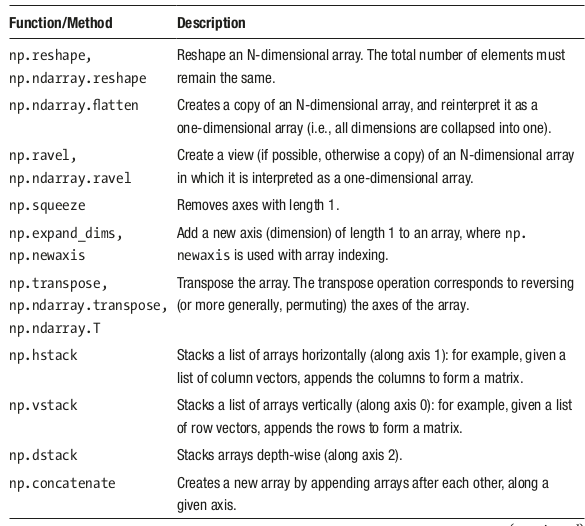

Reshaping an array does not require modifying the underlying array data; it only
changes in how the data is interpreted, by redefining the array’s <code>strides</code> attribute.

An example of this type of operation is a 1D array that is reinterpreted as a 1D array (vector).

In NumPy, the function <code>np.reshape</code>, or the <code>ndarray</code> class method <code>reshape</code>, can be used to reconfigure how the underlying data is interpreted. It takes an array and the new shape of the array as arguments:

In [21]:
data = np.array([[1, 2], [3, 4]])
np.reshape(data, (1, 4))

array([[1, 2, 3, 4]])

In [22]:
data.reshape(4)

array([1, 2, 3, 4])

It is necessary that the requested new shape of the array match the number of
elements in the original size.

Note that reshaping an array produces a view of the array, and if an independent copy of the array is needed, the view has to be copied explicitly (e.g., using <code>np.copy</code>).

The <code>np.ravel</code> (and its corresponding <code>ndarray</code> method) is a special case of reshape,
which collapses all dimensions of an array and returns a flattened one-dimensional array with a length that corresponds to the total number of elements in the original array. The <code>ndarray</code> method <code>flatten</code> performs the same function but returns a copy instead of a view.

In [24]:
data = np.array([[1, 2], [3, 4]])
data

array([[1, 2],
       [3, 4]])

In [29]:
data.flatten()

array([1, 2, 3, 4])

In [28]:
data.flatten().shape

(4,)

While <code>np.ravel</code> and </code>np.flatten</code> collapse the axes of an array into a one-dimensional array, it is also possible to introduce new axes into an array, either by <code>using np.reshape</code> or, when adding new empty axes, using indexing notation and the <code>np.newaxis</code> keyword at the place of a new axis.

In [33]:
data = np.arange(0, 5)
column = data[:, np.newaxis]
column.shape
column

array([[0],
       [1],
       [2],
       [3],
       [4]])

In [41]:
row = data[np.newaxis, :]
row

array([[0, 1, 2, 3, 4]])

In addition to reshaping and selecting subarrays, it is often necessary to merge arrays into bigger arrays, for example, when joining separately computed or measured data series into a higher-dimensional array, such as a matrix. For this task, NumPy provides the functions <code>np.vstack</code>, for vertical stacking of, for example, rows into a matrix, and <code>np.hstack</code> for horizontal stacking of, for example, columns into a matrix.

Consider the following case: say we have one-dimensional arrays of data, and we want to stack them vertically to obtain a matrix where the rows are made up of the one-dimensional arrays. We can use <code>np.vstack</code> to achieve this

In [43]:
data = np.arange(5)
data

array([0, 1, 2, 3, 4])

In [42]:
np.vstack((data, data, data))

array([[0, 1, 2, 3, 4],
       [0, 1, 2, 3, 4],
       [0, 1, 2, 3, 4]])

If we instead want to stack the arrays horizontally, to obtain a matrix where the arrays are the column vectors, firstly we need to make the input arrays (<code>data</code>) two-dimensional arrays of shape (1, 5) rather than one-dimensional arrays of shape (5,).

As discussed earlier, we can insert a new axis by indexing with <code>np.newaxis</code>:

In [44]:
data = data[:, np.newaxis]
np.hstack((data, data, data))

array([[0, 0, 0],
       [1, 1, 1],
       [2, 2, 2],
       [3, 3, 3],
       [4, 4, 4]])

## Matrix and Vector Operations

One of the main applications of the numpy arrays is to represent the mathematical concepts of vectors, matrices, and tensors, and in this use-case, we also frequently need to calculate vector and matrix operations such as scalar (inner) products, dot (matrix) products, and tensor (outer) products.
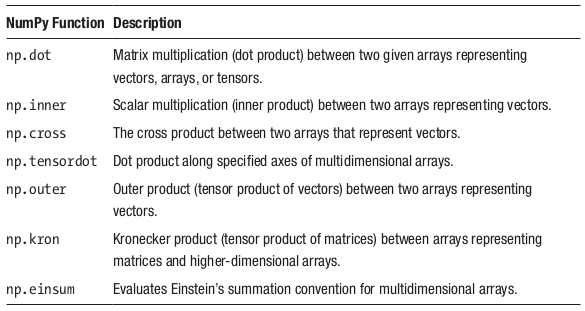

In numpy, the <code>*</code> operator is used for elementwise multiplication. For two two-­
dimensional arrays A and B, the expression A * B therefore does not compute a matrix
product (in contrast to many other computing environments).

The operator <code>@</code> is used for matrix multiplication. Also the numpy function <code>np.dot</code>
is used for this purpose.

To compute the product of two matrices $A$ and $B$, of size $N \times M$ and $M \times P$, which results in a
matrix of size $N \times P$, we can use:

In [3]:
A = np.arange(1, 7).reshape(2, 3)
A

array([[1, 2, 3],
       [4, 5, 6]])

In [4]:
B = np.arange(1, 7).reshape(3, 2)
B

array([[1, 2],
       [3, 4],
       [5, 6]])

In [5]:
A @ B

array([[22, 28],
       [49, 64]])

In [7]:
np.dot(A, B)

array([[22, 28],
       [49, 64]])

We can compute a inverse matrix as follows:

In [18]:
B = np.random.rand(3,3)
B

array([[0.94812002, 0.36921826, 0.75472651],
       [0.83308666, 0.30065259, 0.60104508],
       [0.76985114, 0.31240073, 0.80100831]])

In [19]:
np.linalg.inv(B)

array([[-15.16487706,  17.14028385,   1.42726533],
       [ 58.47613306, -50.99659232, -16.8315815 ],
       [ -8.23123669,   3.41557734,   6.44115233]])

In [20]:
np.linalg.inv(B) @ B

array([[ 1.00000000e+00, -7.96751619e-16, -5.90722841e-17],
       [-7.96184876e-16,  1.00000000e+00, -7.29295141e-16],
       [ 1.91365047e-16,  9.76905021e-19,  1.00000000e+00]])

A expression as $A^T = BAB^{-1}$, can be compute as follows:

In [21]:
A = np.random.rand(3,3)

In [22]:
B @ A @ np.linalg.inv(B) 

array([[-5.65635249,  6.30537871,  1.83356312],
       [-4.90133851,  5.5418111 ,  1.47935199],
       [-5.54363908,  5.94633464,  1.89380072]])

The <code>np.dot</code> function can also be used for matrix-vector multiplication. $A^T = BAB^{-1}$ will be compute as:

In [25]:
Ap = B.dot(A.dot(np.linalg.inv(B)))
Ap

array([[-5.65635249,  6.30537871,  1.83356312],
       [-4.90133851,  5.5418111 ,  1.47935199],
       [-5.54363908,  5.94633464,  1.89380072]])

To improve this situation, numpy provides an alternative data structure to <code>ndarray</code> named matrix, for which expressions like <code>A * B</code> are implemented as <code>matrix</code> multiplication. It also provides some convenient special attributes, like  <code>matrix.I</code> for the inverse matrix.

Using instances of this matrix class, one can therefore use the vastly more readable expression:

In [27]:
A = np.matrix(A)
B = np.matrix(B)
Ap = B * A * B.I
Ap

matrix([[-5.65635249,  6.30537871,  1.83356312],
        [-4.90133851,  5.5418111 ,  1.47935199],
        [-5.54363908,  5.94633464,  1.89380072]])

The inner product (scalar product) between two arrays representing vectors can be
computed using the <code>np.inner</code> function:

In [28]:
x = np.arange(1,10)
np.inner(x, x)

285

or, equivalently, using <code>np.dot</code>:

In [29]:
np.dot(x, x)

285